<a href="https://colab.research.google.com/github/sheebajosetj/Logistic_Regression/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression



## Logistic Regression Algorithm

Even though logistic regression has "regression" in its name, it is used as a classification algorithm. It calculates the probability that a sample belongs to a class. Rather than fitting a line to the data, it fits an "S" shaped curve called the sigmoid function.

The formula for logistic regression is as follows:

$$y = \frac{1}{1 + e^{-z}}$$

where $y$ is the probability that a sample belongs to a class and $z$ is the linear combination of the features.

The algorithm is as follows:

- Initialize the weights.
- Calculate the predicted values.
- Calculate the error.
- Update the weights.
- Repeat the steps above until convergence.


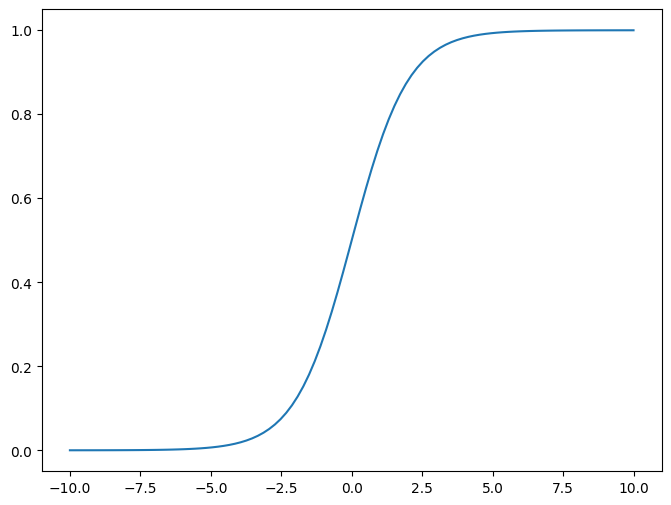

In [ ]:
# plot sigmoid function
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

## Basic Example





<Axes: xlabel='x', ylabel='y'>

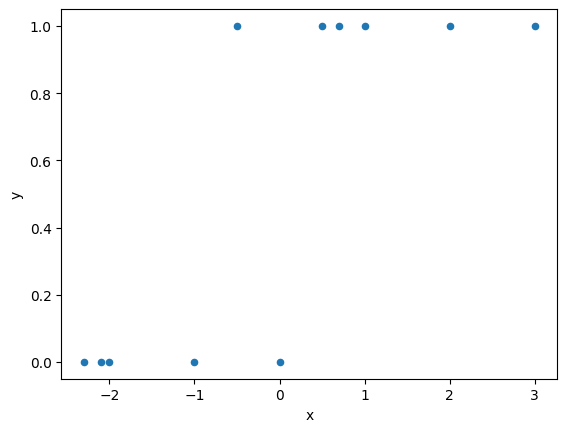

In [ ]:
import pandas as pd
log_data = pd.DataFrame({'x': [-2, -2.3, -2.1, -1, -.5,  0, .5, .7, 1, 2, 3],
                    'y': [0, 0, 0, 0, 1, 0, 1,1, 1, 1, 1]})

log_data.plot.scatter(x='x', y='y')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(log_data[['x']], log_data['y'])


LogisticRegression()

In [ ]:
log_r.coef_

array([[1.24748205]])

In [ ]:
log_r.intercept_

array([0.455222])

Text(2, 0.4, 'Predict 1\nright of this')

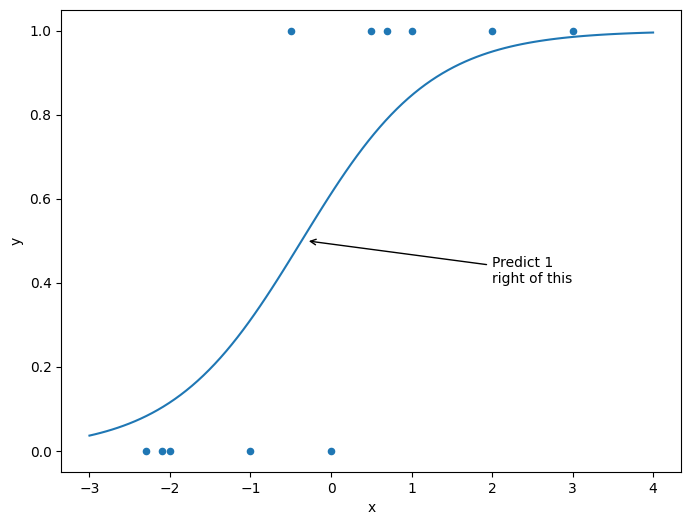

In [ ]:
# plot fitted sigmoid function on top of data
x = np.linspace(-3, 4, 100)
y = 1 / (1 + np.exp(-(log_r.coef_[0][0] * x + log_r.intercept_[0])))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
log_data.plot.scatter(x='x', y='y', ax=ax)
# annotate above .5
ax.annotate('Predict 1\nright of this', xy=(-.31, .5), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

In [ ]:
log_r.predict([[-.3]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Real World Example with Eye movements

From the website:

The dataset consist of several assignments. Each assignment consists of a question followed by ten sentences (titles of news articles). One of the sentences is the correct answer to the question (C) and five of the sentences are irrelevant to the question (I). Four of the sentences are relevant to the question (R), but they do not answer it.

- Features are in columns, feature vectors in rows.
- Each assignment is a time sequence of 22-dimensional feature vectors.
- The first column is the line number, second the assignment number and the next 22 columns (3 to 24) are the different features. Columns 25 to 27 contain extra information about the example. The training data set contains the classification label in the 28th column: "0" for irrelevant, "1" for relevant and "2" for the correct answer.
- Each example (row) represents a single word. You are asked to return the classification of each read sentence.
- The 22 features provided are commonly used in psychological studies on eye movement. All of them are not necessarily relevant in this context.

The objective of the Challenge is to predict the classification labels (I, R, C).


In [ ]:
# https://www.openml.org/da/1044
from datasets import load_dataset
eye = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/eye_movements.csv')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

eye_movements.csv: 0.00B [00:00, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
eye_df = eye['train'].to_pandas()
eye_df


,lineNo,assgNo,prevFixDur,firstfixDur,firstPassFixDur,nextFixDur,firstSaccLen,lastSaccLen,prevFixPos,landingPos,...,totalFixDur,meanFixDur,regressLen,regressDur,pupilDiamMax,pupilDiamLag,timePrtctg,titleNo,wordNo,label
0,9684.0,298.0,99.0,119.0,119.0,238.0,300.1666,288.0156,246.0732,56.6326,...,119.0,119.0000,0.0,0.0,0.1541,0.4446,0.0176,4,3,0
1,2065.0,66.0,119.0,159.0,239.0,100.0,306.1066,117.2359,321.0140,47.3207,...,239.0,119.5000,0.0,159.0,0.0119,0.3264,0.0239,8,1,0
2,1969.0,61.0,139.0,139.0,357.0,179.0,590.5294,805.0531,479.3078,112.3610,...,536.0,178.6667,258.0,0.0,0.0874,0.0859,0.0431,4,8,0
3,10326.0,315.0,199.0,139.0,219.0,99.0,80.9475,306.5587,153.1698,79.8389,...,198.0,99.0000,0.0,396.0,0.0173,0.1453,0.0264,4,2,0
4,6827.0,204.0,80.0,100.0,239.0,139.0,110.7576,161.4845,189.6207,96.7471,...,139.0,139.0000,0.0,378.0,0.3229,0.4074,0.0288,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,10923.0,336.0,219.0,219.0,219.0,119.0,277.4140,27.8568,281.0640,18.6078,...,219.0,219.0000,417.0,139.0,0.2830,0.4085,0.0187,9,4,1
7604,10924.0,336.0,219.0,119.0,278.0,139.0,27.8568,69.0290,111.3643,84.8528,...,278.0,139.0000,0.0,278.0,0.2830,0.4730,0.0237,9,3,1
7605,10925.0,336.0,219.0,219.0,219.0,119.0,69.0290,165.0273,55.7136,30.3026,...,139.0,139.0000,417.0,139.0,0.2830,0.4730,0.0119,9,4,1
7606,10926.0,336.0,139.0,179.0,179.0,80.0,165.0273,1445.4747,122.5887,38.3471,...,179.0,179.0000,0.0,0.0,0.2230,0.4730,0.0153,9,5,1


In [ ]:
from sklearn.preprocessing import StandardScaler

X = eye_df.drop(columns=['label'])
y = eye_df['label']
std = StandardScaler()
X_scaled = std.fit_transform(X)
eye_log = LogisticRegression()
eye_log.fit(X_scaled, y)
eye_log.score(X_scaled, y)

0.5638801261829653

<Axes: >

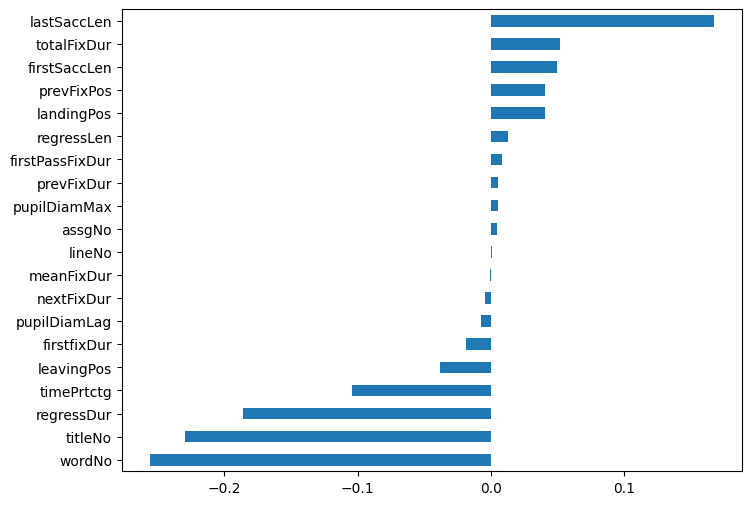

In [ ]:
pd.Series(eye_log.coef_[0], index=X.columns).sort_values().plot.barh(figsize=(8, 6))

## Challenge: Logistic Regression

Create a logistic regression model to predict whether a Titanic passenger survives based on the numeric columns.


In [ ]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/titanic3.xls'
raw = pd.read_excel(url)
raw

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
def tweak_titanic(df):
  return (df
          .loc[:, ['pclass', 'survived',  'age', 'sibsp', 'parch',
       'fare']]
        .dropna()
  )

tweak_titanic(raw)

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,7.2250
1304,3,0,14.5000,1,0,14.4542
1306,3,0,26.5000,0,0,7.2250
1307,3,0,27.0000,0,0,7.2250


## Solution: Logistic Regression

# Decision Trees


## Decision Tree Algorithm

Decision trees are a type of supervised learning algorithm that can be used for both classification and regression. They work by splitting the data into subsets based on the features. The goal is to split the data in a way that minimizes the entropy of the subsets.

In [ ]:
## Create "decision stump"
## fit tree regressor to anscombe's quartet limit to 1 level

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
X = anscombe[['x']]
y = anscombe['y1']
dt.fit(X, y)


In [ ]:
## Plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(dt, ax=ax, feature_names=['x'], filled=True, fontsize=10)

In [ ]:
## Plot the data and predictions on the same plot
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
x1 = np.linspace(4, 14, 100)
y1 = dt.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


In [ ]:
## Now plot to two levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt2.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


In [ ]:
## Now plot unlimited levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
dt3 = DecisionTreeRegressor(max_depth=None)
dt3.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt3.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


## Real World with Aircraft Elevators

In [ ]:
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)


In [ ]:
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_elev, ax=ax, feature_names=X_elev.columns, filled=True, fontsize=10, precision=4)


In [ ]:
dt_elev.score(X_elev, y_elev)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_elev = LinearRegression()
lr_elev.fit(X_elev, y_elev)
lr_elev.score(X_elev, y_elev)

In [ ]:
# loop over depths and plot the results
scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_elev, y_elev)
    scores.append(dt.score(X_elev, y_elev))

pd.Series(scores).plot.line(figsize=(8, 6))

In [ ]:
# split the data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

# annotate overfitting at 10, .7
ax.annotate('Overfitting after here', xy=(10, .7), xytext=(12, .5), arrowprops={'arrowstyle': '->'})

# set title
ax.set_title('Validation Curve for Decision Tree')


In [ ]:
# Let's see if our model improves with a deeper tree
dt_elev = DecisionTreeRegressor(max_depth=11)
dt_elev.fit(X_train, y_train)
dt_elev.score(X_test, y_test)

In [ ]:
lr_elev = LinearRegression()
lr_elev.fit(X_train, y_train)
lr_elev.score(X_test, y_test)

## Random Forests and XGBoost

In [ ]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


In [ ]:
# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
    rf = RandomForestRegressor(n_estimators=100, max_depth=i)
    rf.fit(X_train, y_train)
    test_scores.append(rf.score(X_test, y_test))
    train_scores.append(rf.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

In [ ]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


In [ ]:
# create an xgb regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

## Challenge: Decision Trees

Create a decision tree to predict survival on the titanic. See if you can determine the optimal depth of the tree.

## Solution: Decision Trees

# Conclusion - Next Steps

- Practice, practice, practice! - I recommend using your own data to practice.
- Check out my Feature Engineering course.
- Check out my XGBoost course.